### TAREA 1:

a) Generalizar la función de backpropagation para que contemple la inclusión de una
capa oculta. Aplicar la función al ejemplo de la clasificación circular y validar los
resultados en el dominio x:[-1, 1], y:[-1, 1]. (5 puntos)

b) Si se fija el número máximo de épocas en 1000. ¿Qué número de neuronas
ocultas y qué valor de la tasa de aprendizaje (eta) es óptimo para este problema?
(basta una solución aproximada). (1 punto)

c) Incluir un término de inercia en el método de backpropagation. (1 punto)

d) Generalizar a un número arbitrario de capas (recomendación, definir los pesos
como una lista de matrices, una para cada capa). Aplicar la función al ejemplo de la
espiral y validar los resultados en el dominio x:[-1, 1], y [-1, 1]. (3 puntos)

#### Backpropagation para un número arbitario de capas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
lin = pd.read_csv("lineal.csv", names=['x1', 'x2', 'y'])
circ = pd.read_csv("circle.csv", names=['x1', 'x2', 'y'])
spir = pd.read_csv("spiral.csv", names=['x1', 'x2', 'y'])

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))
def mse(x,y):
    return np.mean((x-y)**2)

In [4]:
def backprop(a,b,h,epochs = 500, eta = 0.1):
    # a tiene tantas columnas como datos
    # h contiene la el número de nodos de cada capa oculta
    
    # inicializar parametros
    L=len(h)+1
    weights = [np.nan] * L #array con los pesos de cada capa
    bias = [np.nan] * L #array con los sesgos de cada capa
    
    for i in np.arange(L):
        if i == 0:
            weights[i] = np.random.uniform(low=-1, high=1, size=[len(a),h[i]])
            bias[i] = np.random.uniform(low=-1, high=1, size=[h[i],1])
        elif i==(L-1):
            weights[i] = np.random.uniform(low=-1, high=1, size=[h[i-1],len(b)])
            bias[i] = np.random.uniform(low=-1, high=1, size=[len(b),1])
        else:
            weights[i] = np.random.uniform(low=-1, high=1, size=[h[i-1],h[i]])
            bias[i] = np.random.uniform(low=-1, high=1, size=[h[i],1])

    delta_w = [np.nan] * L
    delta_bias = [np.nan] * L
    al = [np.nan] * (L+1) #salidas activadas
    al[0] = a
    Al = [np.nan] * L #salidas sin activar
    dl = [np.nan] * L #delta de cada capa
    error = [np.nan] * epochs
    
    #iteraciones
    for k in np.arange(epochs): 
        #feed forward
        for i in np.arange(L):
            
            Al[i] = np.dot(weights[i].T,al[i]) + bias[i]
            al[i+1] = sigmoid(Al[i])    
        #backpropagating
        for i in np.arange(L-1, -1, -1):
            if i==(L-1):
                dl[i] = (al[L]-b)*d_sigmoid(Al[i])
            else:
                dl[i] = (np.dot(weights[i+1],dl[i+1]))*d_sigmoid(Al[i])
                
            delta_w[i]=-eta*np.dot(al[i],dl[i].T)
            delta_bias[i]=-eta*dl[i].sum(axis=1,keepdims=True)

        #actualizamos pesos y sesgos 
        for i in np.arange(L):
 
            weights[i] = weights[i] + delta_w[i]
            
            for j in np.arange(len(bias[i])):
                bias[i][j] = bias[i][j] + delta_bias[i][j]
        error[k]=mse(al[-1],b)
        
    plt.figure()
    plt.plot(range(1, epochs + 1), error, linestyle='-', color='b')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.grid(True)
    plt.show()
    
    
    return [weights,bias,mse(al[-1],b)]

### a)

(100, 100)

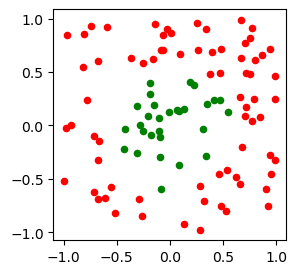

In [5]:
#aplicación al dataset circle

data=circ
ceros = np.where(data['y']==0)[0]
unos = np.where(data['y']==1)[0]
plt.figure(figsize = [3, 3])
plt.scatter(data['x1'][ceros], data['x2'][ceros], color = 'r', s=20)
plt.scatter(data['x1'][unos], data['x2'][unos], color = 'g', s=20)
a = data[['x1', 'x2']].T.values
b = data['y'].values.reshape(1, len(data['y'].values))
np.shape(np.dot(b.T, b))

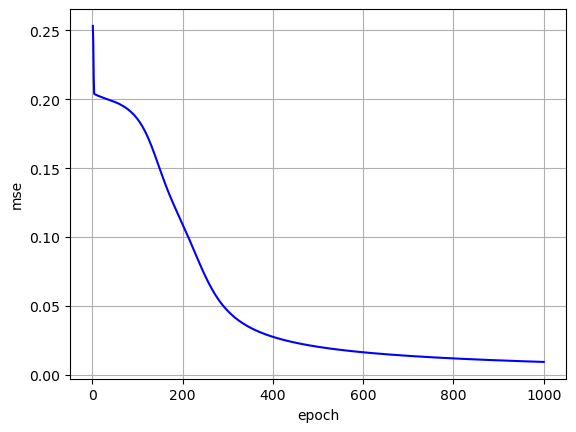

In [6]:
np.random.seed(0)
parametros = backprop(a,b,h=[8], epochs = 1000, eta = 0.1)

In [7]:
num_points = 100

# Generate the x and y coordinates for the grid
x = np.linspace(-1, 1, num_points)
y = np.linspace(-1, 1, num_points)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Flatten the grid into a matrix of size [2, num_points*num_points]
grid_matrix = np.vstack([X.ravel(), Y.ravel()])

In [8]:
#zonas de predicción del modelo en un grid:
X=grid_matrix
Y=X.copy()
for i in np.arange(len(parametros[0])):
    Y = sigmoid(np.dot(parametros[0][i].T,Y)+parametros[1][i])
Y=np.where(Y > 0.5, 1, 0)

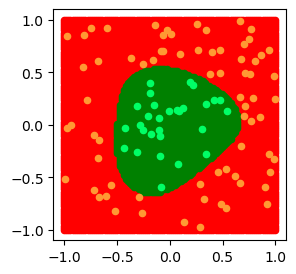

In [9]:
ceros = np.where(Y==0)[1]
unos = np.where(Y==1)[1]
cerosds = np.where(data['y']==0)[0]
unosds = np.where(data['y']==1)[0]
plt.figure(figsize = [3, 3])
plt.scatter(X[0,:][ceros], X[1,:][ceros], color = 'r', s=20)
plt.scatter(X[0,:][unos], X[1,:][unos], color = 'g', s=20)
plt.scatter(data['x1'][cerosds], data['x2'][cerosds], color = (1.0, 0.6, 0.2), s=20)
plt.scatter(data['x1'][unosds], data['x2'][unosds], color = (0.0, 1.0, 0.4), s=20)

Vemos que el modelo ajusta bien los datos.

### b)

In [10]:
#modificamos la función de backprop para no pintar plots al recorrer el grid de configuraciones de la red
def backpropSinPlot(a,b,h,epochs = 500, eta = 0.1):
    # a tiene tantas columnas como datos
    # h contiene la el número de nodos de cada capa oculta
    
    # inicializar parametros
    L=len(h)+1
    weights = [np.nan] * L #array con los pesos de cada capa
    bias = [np.nan] * L #array con los sesgos de cada capa
    
    for i in np.arange(L):
        if i == 0:
            weights[i] = np.random.uniform(low=-1, high=1, size=[len(a),h[i]])
            bias[i] = np.random.uniform(low=-1, high=1, size=[h[i],1])
        elif i==(L-1):
            weights[i] = np.random.uniform(low=-1, high=1, size=[h[i-1],len(b)])
            bias[i] = np.random.uniform(low=-1, high=1, size=[len(b),1])
        else:
            weights[i] = np.random.uniform(low=-1, high=1, size=[h[i-1],h[i]])
            bias[i] = np.random.uniform(low=-1, high=1, size=[h[i],1])

    delta_w = [np.nan] * L
    delta_bias = [np.nan] * L
    al = [np.nan] * (L+1) #salidas activadas
    al[0] = a
    Al = [np.nan] * L #salidas sin activar
    dl = [np.nan] * L #delta de cada capa

    
    #iteraciones
    for k in np.arange(epochs): 
        #feed forward
        for i in np.arange(L):
            
            Al[i] = np.dot(weights[i].T,al[i]) + bias[i]
            al[i+1] = sigmoid(Al[i])    
        #backpropagating
        for i in np.arange(L-1, -1, -1):
            if i==(L-1):
                dl[i] = (al[L]-b)*d_sigmoid(Al[i])
            else:
                dl[i] = (np.dot(weights[i+1],dl[i+1]))*d_sigmoid(Al[i])
                
            delta_w[i]=-eta*np.dot(al[i],dl[i].T)
            delta_bias[i]=-eta*dl[i].sum(axis=1,keepdims=True)

        #actualizamos pesos y sesgos 
        for i in np.arange(L):
 
            weights[i] = weights[i] + delta_w[i]
            
            for j in np.arange(len(bias[i])):
                bias[i][j] = bias[i][j] + delta_bias[i][j]
        
    
    
    return [weights,bias,mse(al[-1],b)]

In [11]:
#hacemos un grid para el número de neuronas ocultas y el valor de la tasa de aprendizaje
np.random.seed(0)
rangoneur = np.arange(1,21)
rangoeta = np.arange(0.1,1+0.1,0.1)
lenneur = len(rangoneur)
leneta = len(rangoeta)
error = np.zeros((lenneur, leneta))  
for i in np.arange(lenneur):
    for j in np.arange(leneta):
        par = backpropSinPlot(a,b,h=[rangoneur[i]], epochs = 1000, eta = rangoeta[j])
        error[i,j] = par[2]        

En la matriz error, la fila de índice i corresponde al i-ésimo número de neuronas del vector rangoneur. Las columnas se corresponden de la misma forma con los valores de eta. La matriz error almacena en cada posición el error mse cometido en la última época del entrenamiento de la red para los valores de eta y número de neuronas correspondientes.

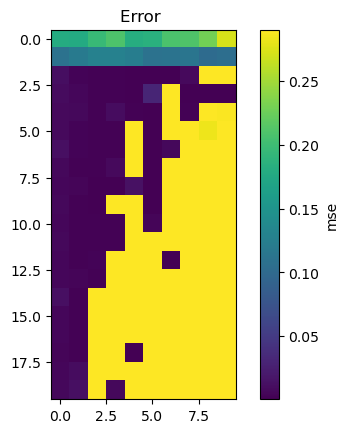

In [12]:
plt.imshow(error, cmap='viridis', interpolation='nearest')
plt.colorbar(label='mse')
plt.title('Error ')
plt.show()

In [13]:
index_of_min = np.argmin(error)
row_index, col_index = np.unravel_index(index_of_min, error.shape)

In [14]:
print('Número de neuronas ocultas óptimo')
print(rangoneur[row_index])
print('Valor de eta')
print(rangoeta[col_index])
print('Mínimo error cometido')
print(np.min(error))


Número de neuronas ocultas óptimo
9
Valor de eta
0.6
Mínimo error cometido
0.0006532135825915164


Para 1000 épocas, los valores del número de neuronas ocultas y del learning rate para los que la red predice mejor sobre el training set son 9 y 0.6 respectivamente. El error mse cometido en este caso es de 0.0007.

### c)

In [15]:
#backprop con termino de inercia
def backpropConInercia(a,b,h,epochs = 500, eta = 0.1,inertia = 0.5):
    # a tiene tantas columnas como datos
    # h contiene la el número de nodos de cada capa oculta
    
    # inicializar parametros
    L=len(h)+1
    weights = [np.nan] * L #array con los pesos de cada capa
    bias = [np.nan] * L #array con los sesgos de cada capa
    delta_w = [np.nan] * L
    
    for i in np.arange(L):
        if i == 0:
            weights[i] = np.random.uniform(low=-1, high=1, size=[len(a),h[i]])
            bias[i] = np.random.uniform(low=-1, high=1, size=[h[i],1])
            delta_w[i] = np.zeros((len(a),h[i]))
        elif i==(L-1):
            weights[i] = np.random.uniform(low=-1, high=1, size=[h[i-1],len(b)])
            bias[i] = np.random.uniform(low=-1, high=1, size=[len(b),1])
            delta_w[i] = np.zeros((h[i-1],len(b)))
        else:
            weights[i] = np.random.uniform(low=-1, high=1, size=[h[i-1],h[i]])
            bias[i] = np.random.uniform(low=-1, high=1, size=[h[i],1])
            delta_w[i] = np.zeros((h[i-1],h[i]))

    
    delta_bias = [np.nan] * L
    al = [np.nan] * (L+1) #salidas activadas
    al[0] = a
    Al = [np.nan] * L #salidas sin activar
    dl = [np.nan] * L #delta de cada capa
    error = [np.nan] * epochs
    
    #iteraciones
    for k in np.arange(epochs): 
        #feed forward
        for i in np.arange(L):
            
            Al[i] = np.dot(weights[i].T,al[i]) + bias[i]
            al[i+1] = sigmoid(Al[i])    
        #backpropagating
        for i in np.arange(L-1, -1, -1):
            if i==(L-1):
                dl[i] = (al[L]-b)*d_sigmoid(Al[i])
            else:
                dl[i] = (np.dot(weights[i+1],dl[i+1]))*d_sigmoid(Al[i])
                
            delta_w[i]=-eta*np.dot(al[i],dl[i].T) + inertia*delta_w[i]
            delta_bias[i]=-eta*dl[i].sum(axis=1,keepdims=True)

        #actualizamos pesos y sesgos 
        for i in np.arange(L):
 
            weights[i] = weights[i] + delta_w[i]
            
            for j in np.arange(len(bias[i])):
                bias[i][j] = bias[i][j] + delta_bias[i][j]
        error[k]=mse(al[-1],b)
        
    plt.figure()
    plt.plot(range(1, epochs + 1), error, linestyle='-', color='b')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.grid(True)
    plt.show()
    
    
    return [weights,bias,mse(al[-1],b)]

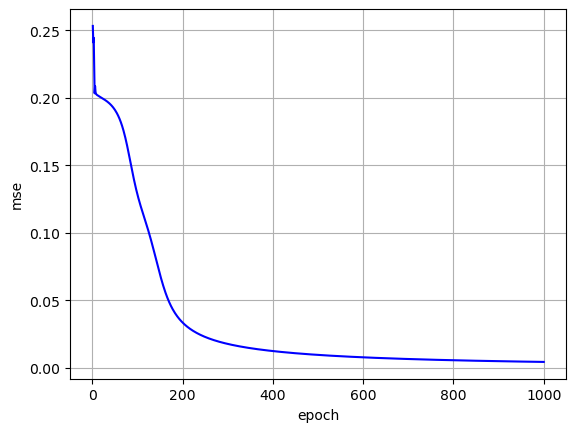

In [16]:
np.random.seed(0)
parametrosConInercia = backpropConInercia(a,b,h=[8], epochs = 1000, eta = 0.1,inertia=0.5)

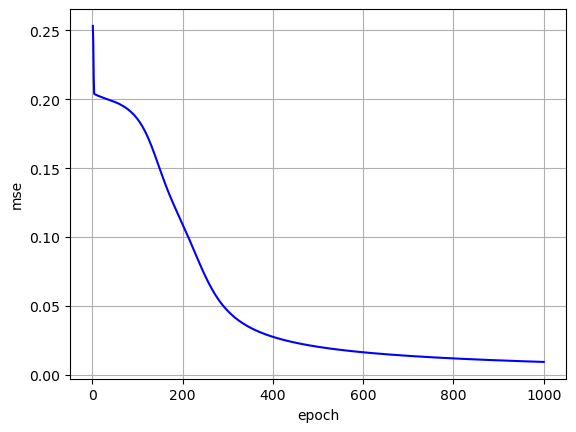

In [17]:
np.random.seed(0)
parametrosSinInercia = backprop(a,b,h=[8], epochs = 1000, eta = 0.1)

In [18]:
parametrosConInercia[2]

0.0042628535013208325

In [19]:
parametrosSinInercia[2]

0.009200254019074167

Comprobamos que el término de inercia ayuda a hacer más rápido el proceso de aprendizaje viendo que en la misma cantidad de iteraciones, el algoritmo con inercia obtiene un resultado un poco mejor que sin el término de inercia.

### d)

(2000, 2000)

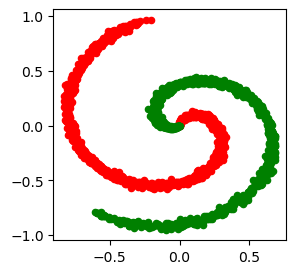

In [20]:
#aplicación al dataset spiral con varias capas

data=spir
ceros = np.where(data['y']==0)[0]
unos = np.where(data['y']==1)[0]
plt.figure(figsize = [3, 3])
plt.scatter(data['x1'][ceros], data['x2'][ceros], color = 'r', s=20)
plt.scatter(data['x1'][unos], data['x2'][unos], color = 'g', s=20)
a = data[['x1', 'x2']].T.values
b = data['y'].values.reshape(1, len(data['y'].values))
np.shape(np.dot(b.T, b))

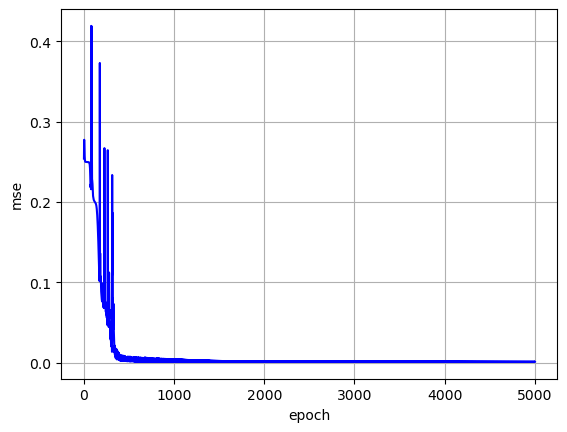

In [27]:
np.random.seed(0)
parametros = backpropConInercia(a,b,h=[8,8,4], epochs = 5000, eta = 0.01,inertia = 0.9)

In [28]:
num_points = 100

# Generate the x and y coordinates for the grid
x = np.linspace(-1, 1, num_points)
y = np.linspace(-1, 1, num_points)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Flatten the grid into a matrix of size [2, num_points*num_points]
grid_matrix = np.vstack([X.ravel(), Y.ravel()])

In [29]:
#zonas de predicción del modelo en un grid:
X=grid_matrix
Y=X.copy()
for i in np.arange(len(parametros[0])):
    Y = sigmoid(np.dot(parametros[0][i].T,Y)+parametros[1][i])
Y=np.where(Y > 0.5, 1, 0)

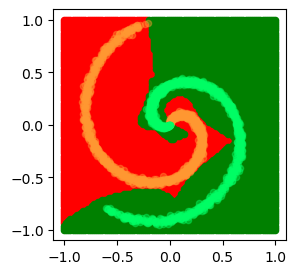

In [30]:
ceros = np.where(Y==0)[1]
unos = np.where(Y==1)[1]
cerosds = np.where(data['y']==0)[0]
unosds = np.where(data['y']==1)[0]
plt.figure(figsize = [3, 3])
plt.scatter(X[0,:][ceros], X[1,:][ceros], color = 'r', s=20)
plt.scatter(X[0,:][unos], X[1,:][unos], color = 'g', s=20)
plt.scatter(data['x1'][cerosds], data['x2'][cerosds], color = (1.0, 0.6, 0.2), s=20,alpha=0.4)
plt.scatter(data['x1'][unosds], data['x2'][unosds], color = (0.0, 1.0, 0.4), s=20,alpha=0.4)

Como vemos en la figura, las áreas asociadas a cada color clasifican bastante bien los puntos del dataset.

In [31]:
parametros[2]

0.0009210264130948383

Las etiquetas que se usan en el entrenamiento del modelo son ceros y unos. De esta forma, el mse de la última época, devuelto por la función backprop, coincide con el porcentaje de fallos. Obtenemos un 0.09 % de fallos sobre el dataset, que es un buen valor.